In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
!pip install pyclustering

In [6]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


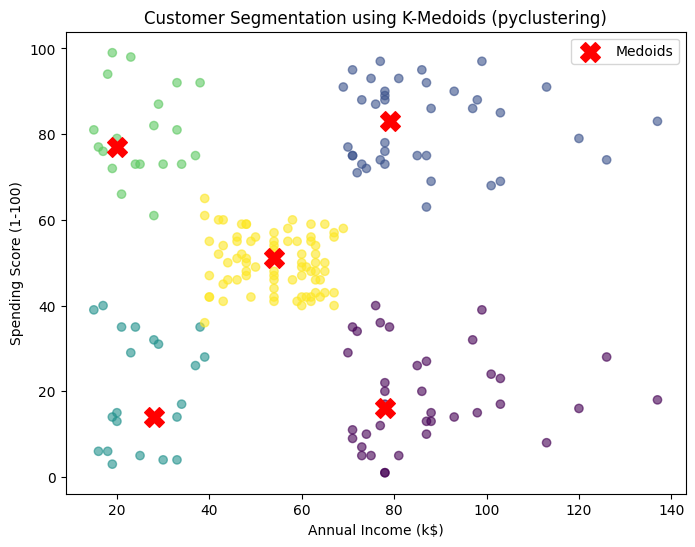

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
manhattan_metric = distance_metric(type_metric.MANHATTAN)
initial_medoids = [0, 20, 40, 60, 80] 
kmedoids_instance = kmedoids(X, initial_medoids, data_type='points', metric=manhattan_metric)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoid_indices = kmedoids_instance.get_medoids()
medoids = X[medoid_indices]
labels = np.zeros(len(X))
for i, cluster in enumerate(clusters):
    for index in cluster:
        labels[index] = i
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', s=200, label='Medoids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Medoids (pyclustering)")
plt.legend()
plt.show()
